<a href="https://colab.research.google.com/github/ucfilho/Biochemical_Engineering/blob/master/Courses/Eng_Bioq_2025_02/aula_02_Reator_batelada_alimentada_nao_isotermico_out_24_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
t0=0;tf=10;
Xreator=10;Sreator=10;Preator=10;Flow=400000;
MI_m=0.4;Ks=2;Yxs=0.5;Ypx=0.8;
X0=0;P0=0;S0=160;Vol=600000;
Vol_Ini=Vol*1/10;# cheio com 10%
x0=[Sreator,Xreator,Preator,Vol_Ini];


In [ ]:
k0=4.50e10;E=1.54e4;R=1.987;
Yxs=0.033;Yps=0.445;Ks=1.6;Xmax=100.0;deltaH=-158.0;
n=3;m=0.9;a=-0.0676;A=4.5e10;
#Falim=100;
F1=0;Falim=80;T1=32;
Fc=180;Fj=180;
Rhoj=1000;Rho=950;
Cp=1;Cpj=1;
V0=50;Vc=20;Vj=20;Vdorna=300;
A=210;U=3500;
Alfa=895.3;Beta=-0.0676;
T1=32;Tc=30;Tj=30;T0=30;Tje=25;
V1=50;
X0=50;S0=180;P0=1;
t0=0;
x0=[T1,Tc,Tj,V0,X0,S0,P0];
tf =12

In [ ]:
def f(Var,t):
  T1=Var[0];Tc=Var[1];Tj=Var[2];
  V1=Var[3];X1=Var[4];S1=Var[5];P1=Var[6];
  Pmax=Alfa*np.exp(Beta*T1);
  MI_0=k0*np.exp(-E/(R*(T1+273)));
  MI=MI_0*S1/(S1+Ks)*(1-P1/Pmax)**n*(1-X1/Xmax)**m;
  if(V1 < Vdorna):
     F0=Falim
  else:
     F0=0;V1=Vdorna

  LMDT=((T1-Tj)-(Tc-Tje))/np.log((T1-Tj)/(Tc-Tje)) ;
  dT1_dt=(F0*T0-F1*T1-F0*T1+Fc*(Tc-T1)-deltaH*X1/(Rho*Cp*Yxs))/V1;
  dTc_dt=Fc/Vc*(T1-Tc)-U*A/(Rho*Cp*Vc)*LMDT;
  dTj_dt=Fj/Vj*(Tje-Tj)+U*A/(Rhoj*Cpj*Vj)*LMDT;
  dV1_dt=F0;
  dS1_dt=(F0*S0-F1*S1-F0*S1-V1*X1*MI/Yxs)/V1;
  dX1_dt=(F0*X0-F1*X1-F0*X1+V1*X1*MI)/V1;
  dP1_dt=(F0*P0-F1*P1-F0*P1+V1*X1*MI*(Yps/Yxs))/V1;

  derivadas = [dT1_dt,dTc_dt,dTj_dt,dV1_dt,dX1_dt,dS1_dt,dP1_dt]

  return derivadas

In [ ]:
t = np.linspace(t0, tf, 101)
x = odeint(f, x0, t )

Text(0, 0.5, 'T1-°C')

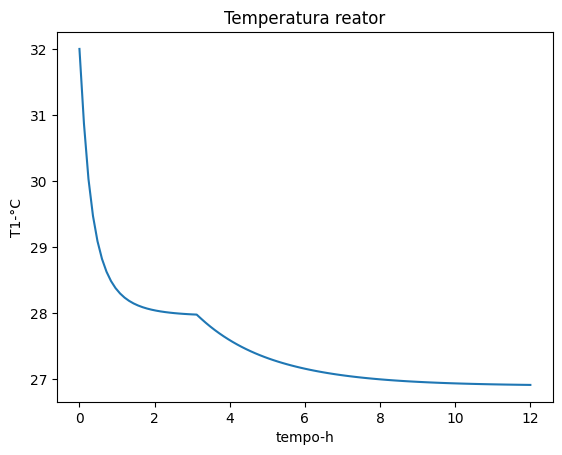

In [ ]:
plt.plot(t,x[:,0])
plt.title('Temperatura reator')
plt.xlabel('tempo-h')
plt.ylabel('T1-°C')

Text(0, 0.5, 'T-°C')

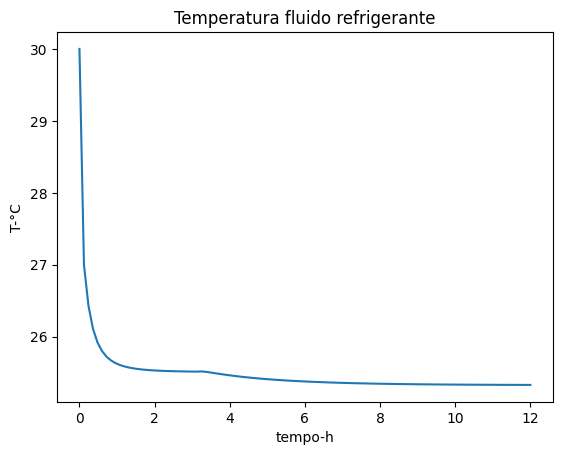

In [ ]:
plt.plot(t,x[:,1]) #x0=[T1,Tc,Tj,V0,X0,S0,P0];
plt.title('Temperatura fluido refrigerante')
plt.xlabel('tempo-h')
plt.ylabel('T-°C')

Text(0, 0.5, 'T -°C')

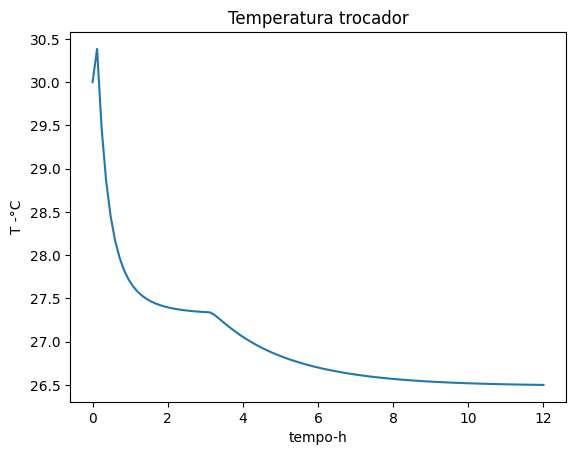

In [ ]:
plt.plot(t,x[:,2])
plt.title('Temperatura trocador')
plt.xlabel('tempo-h')
plt.ylabel('T -°C')

Text(0, 0.5, 'Volume-m3')

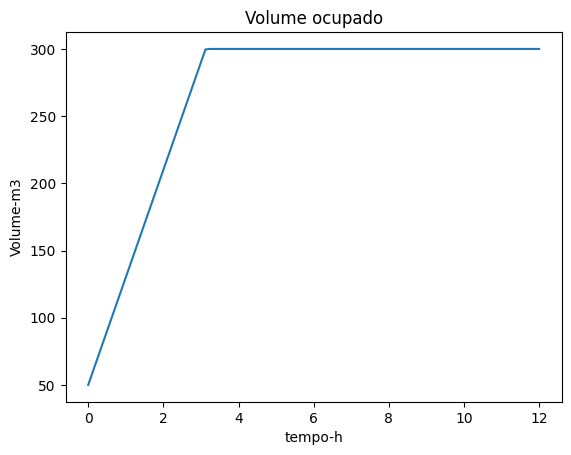

In [ ]:
plt.plot(t,x[:,3]) # x0=[T1,Tc,Tj,V0,X0,S0,P0];
plt.title('Volume ocupado')
plt.xlabel('tempo-h')
plt.ylabel('Volume-m3')

Text(0, 0.5, 'X g/L')

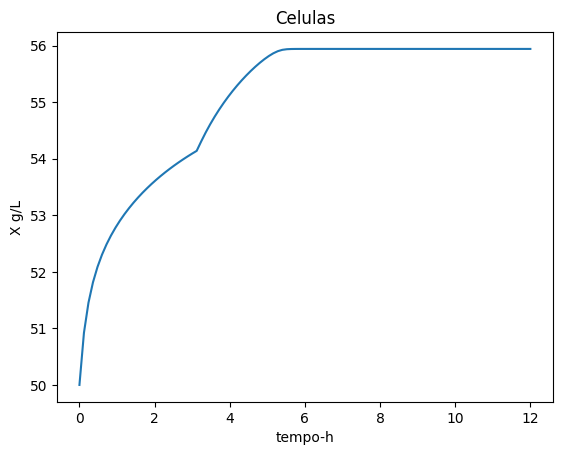

In [ ]:
plt.plot(t,x[:,4])
plt.title('Celulas')
plt.xlabel('tempo-h')
plt.ylabel('X g/L')

Text(0, 0.5, 'Volume-m3')

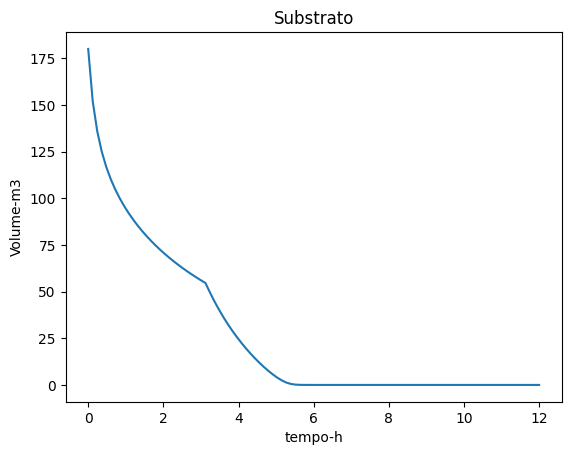

In [ ]:
plt.plot(t,x[:,5])
plt.title('Substrato')
plt.xlabel('tempo-h')
plt.ylabel('Volume-m3')

Text(0, 0.5, 'P-g/L')

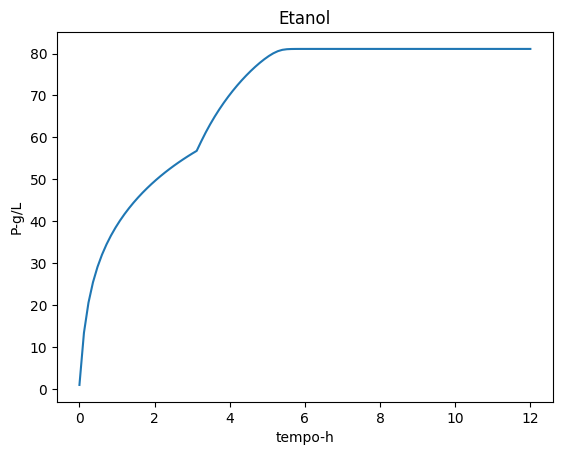

In [ ]:
plt.plot(t,x[:,6])
plt.title('Etanol')
plt.xlabel('tempo-h')
plt.ylabel('P-g/L')